## Introduction to the geopandas and folium Libraries

The geopandas and folium libraries are two Python libraries that can be used to manipulate and plot geospatial data.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Let's load in our zipcode dataset. This is a geojson file, which was downloaded from https://data.nashville.gov/Metro-Government/Zip-Codes/72um-tmbe. Geosjson is a standard, based on JSON, for representing geographic features.

We can use the geopandas `read_file()` function to read geojson or other types of files holding geospatial data.

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
zipcodes.head( )

,zipcode,poname,created_date,objectid,globalid,created_user,last_edited_date,last_edited_user,geometry
0,37218,NASHVILLE,None,55,{3CB897BE-ACCB-46CB-BA4E-6F5E39D6C451},None,None,None,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ..."
1,37080,JOELTON,None,32,{C63ADE44-CC5E-4CCD-BBF0-4B8A64864B42},None,None,None,"MULTIPOLYGON (((-86.90742 36.39053, -86.90725 ..."
2,37027,BRENTWOOD,None,44,{8846D4AC-5F8A-4434-8348-C9A28297FA4E},None,None,None,"MULTIPOLYGON (((-86.67793 35.98782, -86.67941 ..."
3,37086,LA VERGNE,None,5,{1618FE99-089D-4ED0-BAFA-C29A19596F3D},None,None,None,"MULTIPOLYGON (((-86.58870 36.02671, -86.58836 ..."
4,37219,NASHVILLE,None,15,{B531C81C-3919-4059-8444-23F5F0684ECA},None,None,None,"MULTIPOLYGON (((-86.78609 36.17465, -86.78585 ..."


In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In checking the type, we can see that we have a GeoDataFrame. A GeoDataFrame is similar to a pandas DataFrame, but it has two additional attributes:
* A CRS (coordinate reference system), which defines a projection
* A geometry column, which contains some time of geometry object. For example, point, line, poolygon, or multipolygon

In [4]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Let's examine the first geometry object.

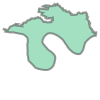

In [5]:
zipcodes.loc[0, 'geometry']

If we print this object, we can see that it is made up of polygons defined by coordinates.

In [6]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.882314704855 36.262480354493, -86.882699985096 36.261485812789, -86.883117190452 36.261269226955, -86.883025614362 36.261238589246, -86.882548952688 36.26108228847, -86.881189972437 36.260636656103, -86.879272070205 36.260444050326, -86.87882462272 36.258881935271, -86.878711032129 36.258485362966, -86.878597422028 36.258088712826, -86.877144221494 36.257708094959, -86.877129756743 36.257688420802, -86.876634492889 36.256977787607, -86.876636188644 36.256977775304, -86.876604134915 36.256931583679, -86.876446616656 36.256704173744, -86.876252949552 36.256428127529, -86.876107147419 36.256217390174, -86.875978613035 36.256034546553, -86.875777054059 36.255750041546, -86.875718778768 36.25566366072, -86.875363605291 36.254952004985, -86.875022914166 36.255059957892, -86.873889911588 36.255413184469, -86.872985075529 36.255296657705, -86.872859638289 36.253515292224, -86.872153325485 36.252944618317, -86.872254269824 36.251515432502, -86.872273095737 36.25125377941, -8

Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() method.

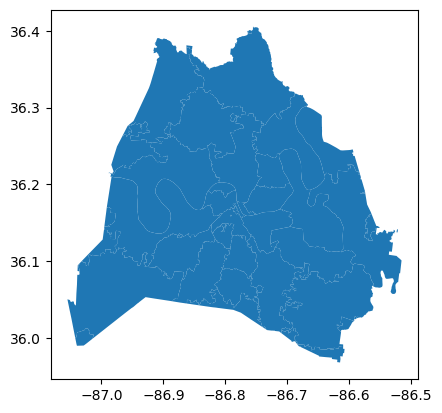

In [7]:
zipcodes.plot();

Now, let's add our bus stops data. This was downloaded as a csv from https://data.nashville.gov/Transportation/WeGo-Transit-Bus-Stops/vfe9-k7vc.

In [8]:
bus_stops = pd.read_csv('../data/WeGo_Transit_Bus_Stops_20231025.csv')

bus_stops.head()

,Stop ID,Stop Abbreviation,Stop Name,Shelter?,Bench?,Route Numbers,Route Name,Mapped Location
0,5120,7AVUNINN,7TH AVE & UNION ST NB,False,False,NaN,AIRPORT - DOWNTOWN HOTELS,NaN
1,5455,CM5_4,Temporary Bay 4,False,False,NaN,HERMAN,NaN
2,2762,23ACLASF,23RD AVE N & CLARKSVILLE PIKE SB,False,False,22,BORDEAUX,NaN
3,4079,21ACHUSN,21ST AVE N & CHURCH ST SB,False,True,25,MIDTOWN,NaN
4,4133,GRWHIWN,GREEN LN & WHITES CREEK PIKE WB,False,False,41,GOLDEN VALLEY,"(36.236249, -86.816722)"


In [9]:
bus_stops['lat'] = bus_stops['Mapped Location'].str.split(',', expand = True)[0].str.strip('(').astype(float)
bus_stops['lng'] = bus_stops['Mapped Location'].str.split(',', expand = True)[1].str.strip(')').astype(float)
bus_stops.head()

,Stop ID,Stop Abbreviation,Stop Name,Shelter?,Bench?,Route Numbers,Route Name,Mapped Location,lat,lng
0,5120,7AVUNINN,7TH AVE & UNION ST NB,False,False,NaN,AIRPORT - DOWNTOWN HOTELS,NaN,NaN,NaN
1,5455,CM5_4,Temporary Bay 4,False,False,NaN,HERMAN,NaN,NaN,NaN
2,2762,23ACLASF,23RD AVE N & CLARKSVILLE PIKE SB,False,False,22,BORDEAUX,NaN,NaN,NaN
3,4079,21ACHUSN,21ST AVE N & CHURCH ST SB,False,True,25,MIDTOWN,NaN,NaN,NaN
4,4133,GRWHIWN,GREEN LN & WHITES CREEK PIKE WB,False,False,41,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722


Currently, bus_stops is a regular DataFrame. If we want to be able to perform geospatial operations with it, we need to convert it to a GeoDataFrame. To do this, we need two things, geometry and a crs. 

To create the geometry, we can use the `points_from_xy` function.

In [10]:
bus_stops['geometry'] = gpd.points_from_xy(bus_stops['lng'], bus_stops['lat'])
bus_stops.head()

,Stop ID,Stop Abbreviation,Stop Name,Shelter?,Bench?,Route Numbers,Route Name,Mapped Location,lat,lng,geometry
0,5120,7AVUNINN,7TH AVE & UNION ST NB,False,False,NaN,AIRPORT - DOWNTOWN HOTELS,NaN,NaN,NaN,POINT EMPTY
1,5455,CM5_4,Temporary Bay 4,False,False,NaN,HERMAN,NaN,NaN,NaN,POINT EMPTY
2,2762,23ACLASF,23RD AVE N & CLARKSVILLE PIKE SB,False,False,22,BORDEAUX,NaN,NaN,NaN,POINT EMPTY
3,4079,21ACHUSN,21ST AVE N & CHURCH ST SB,False,True,25,MIDTOWN,NaN,NaN,NaN,POINT EMPTY
4,4133,GRWHIWN,GREEN LN & WHITES CREEK PIKE WB,False,False,41,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.81672 36.23625)


For the crs, we can borrow the one from the zipcodes.

The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry

In [11]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = zipcodes.crs, 
                           geometry = bus_stops['geometry'])
bus_geo.head()

,Stop ID,Stop Abbreviation,Stop Name,Shelter?,Bench?,Route Numbers,Route Name,Mapped Location,lat,lng,geometry
0,5120,7AVUNINN,7TH AVE & UNION ST NB,False,False,NaN,AIRPORT - DOWNTOWN HOTELS,NaN,NaN,NaN,POINT EMPTY
1,5455,CM5_4,Temporary Bay 4,False,False,NaN,HERMAN,NaN,NaN,NaN,POINT EMPTY
2,2762,23ACLASF,23RD AVE N & CLARKSVILLE PIKE SB,False,False,22,BORDEAUX,NaN,NaN,NaN,POINT EMPTY
3,4079,21ACHUSN,21ST AVE N & CHURCH ST SB,False,True,25,MIDTOWN,NaN,NaN,NaN,POINT EMPTY
4,4133,GRWHIWN,GREEN LN & WHITES CREEK PIKE WB,False,False,41,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.81672 36.23625)


In [12]:
type(bus_geo)

geopandas.geodataframe.GeoDataFrame

We can plot the bus stops.

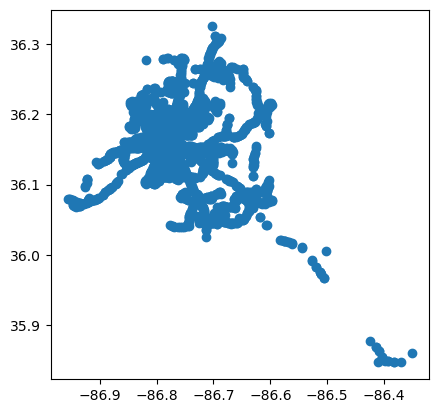

In [13]:
bus_geo.plot();

Let's say we want to determine which zip code each bus stop is located in. For this, we can perform a **spatial join**. 

In [14]:
stops_by_zip = gpd.sjoin(bus_geo, zipcodes, predicate = 'within')
stops_by_zip.head()

,Stop ID,Stop Abbreviation,Stop Name,Shelter?,Bench?,Route Numbers,Route Name,Mapped Location,lat,lng,geometry,index_right,zipcode,poname,created_date,objectid,globalid,created_user,last_edited_date,last_edited_user
4,4133,GRWHIWN,GREEN LN & WHITES CREEK PIKE WB,False,False,41,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.81672 36.23625),8,37189,WHITES CREEK,None,50,{AD8029C0-DF92-4103-B4DF-A67EF4F502E1},None,None,None
1003,4997,OLDCOBEN,OLD HICKORY BLVD & COBBLESTONE CREEK DR EB,False,False,43,HICKORY HILLS,"(36.278199, -86.789015)",36.278199,-86.789015,POINT (-86.78902 36.27820),8,37189,WHITES CREEK,None,50,{AD8029C0-DF92-4103-B4DF-A67EF4F502E1},None,None,None
1710,4933,WCHS,WHITES CREEK HIGH SCHOOL,False,False,43,HICKORY HILLS,"(36.276203, -86.819009)",36.276203,-86.819009,POINT (-86.81901 36.27620),8,37189,WHITES CREEK,None,50,{AD8029C0-DF92-4103-B4DF-A67EF4F502E1},None,None,None
2213,5331,GREKNIWF,GREEN LN & KNIGHT DR WB,False,False,41,GOLDEN VALLEY,"(36.236813, -86.803848)",36.236813,-86.803848,POINT (-86.80385 36.23681),8,37189,WHITES CREEK,None,50,{AD8029C0-DF92-4103-B4DF-A67EF4F502E1},None,None,None
2571,4995,OLDCOBWN,OLD HICKORY BLVD & COBBLESTONE CREEK DR WB,False,False,43,HICKORY HILLS,"(36.278342, -86.788981)",36.278342,-86.788981,POINT (-86.78898 36.27834),8,37189,WHITES CREEK,None,50,{AD8029C0-DF92-4103-B4DF-A67EF4F502E1},None,None,None


Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon.

In [15]:
stops_by_zip['zipcode'].value_counts()

zipcode
37207    272
37203    237
37206    205
37211    174
37208    165
37209    149
37210    141
37217    121
37115    106
37013    103
37204     90
37216     88
37214     87
37212     86
37218     83
37215     53
37205     52
37076     50
37219     48
37221     45
37201     36
37138     32
37228     27
37213     10
37027      9
37072      7
37189      5
37240      4
Name: count, dtype: int64

Let's take a closer look at the 272 bus stops in the 37207 zip code. We can plot the polygon for that zipcode and the stops together.

Note also that I can color my plot by specifying a `column` to color by.

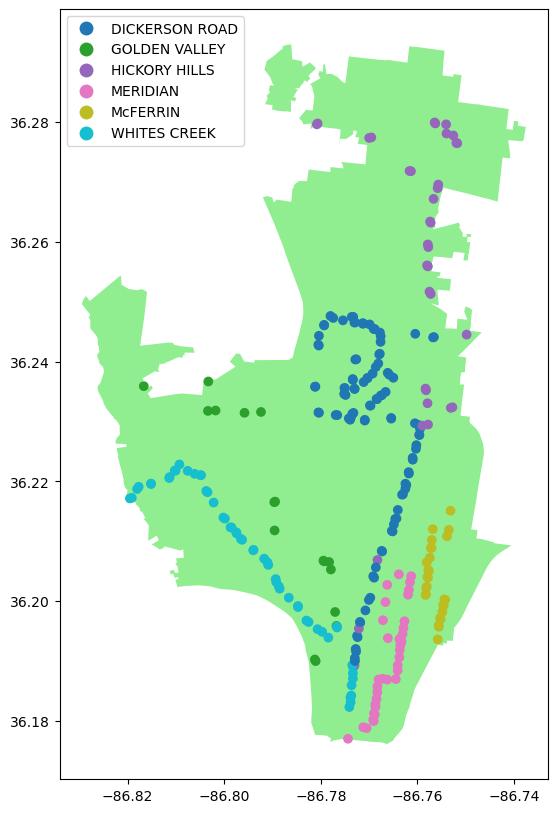

In [16]:
zipcode = '37207'

ax = zipcodes[zipcodes['zipcode'] == zipcode].plot(figsize = (8, 10), color = 'lightgreen')
stops_by_zip[stops_by_zip['zipcode'] == zipcode].plot( ax = ax, column = 'Route Name', legend = True);

We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [17]:
zipcode = "37207"
center = zipcodes[zipcodes['zipcode'] == zipcode].geometry.representative_point().iloc[0]
print(center)

POINT (-86.78109953174281 36.234349176483)


Folium requires a location point as an array. Note that geopandas uses longitude, and folium does latitude first!

In [18]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]
area_center

[36.234349176483, -86.78109953174281]

To create a folium map just call the folium `Map()` constructor. We'll specify two arguments:
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [19]:
map = folium.Map(location =  area_center, zoom_start = 12)
map

We can add a polygon to our map using the GeoJson constructor.

In [20]:
zipcode = "37207"   # zipcode of interest

# Find a representative point to center the map
center = zipcodes[zipcodes['zipcode'] == zipcode].geometry.representative_point().iloc[0]
area_center = [center.y, center.x]

map = folium.Map(location =  area_center, zoom_start = 12)

# Get the polygon for the zipcode of interest and add to map
polygon = zipcodes[zipcodes['zipcode'] == zipcode].geometry
folium.GeoJson(polygon).add_to(map)

map

We can also create markers to add to our map using the `Marker` constructor.

We'll make use of [font-awesome](https://fontawesome.com/v4/icons/) to set the icon for our markers.

In [21]:
row = stops_by_zip[stops_by_zip['zipcode'] == zipcode].iloc[0]
row

Stop ID                                                4954
Stop Abbreviation                                  DOVMOOEF
Stop Name                     DOVERSIDE DR & MOORWOOD DR EB
Shelter?                                              False
Bench?                                                False
Route Numbers                                            23
Route Name                                   DICKERSON ROAD
Mapped Location                     (36.240342, -86.772854)
lat                                               36.240342
lng                                              -86.772854
geometry                       POINT (-86.772854 36.240342)
index_right                                              18
zipcode                                               37207
poname                                            NASHVILLE
created_date                                           None
objectid                                                 48
globalid             {9B931215-5390-4FCF

In [22]:
zipcode = "37207"   # zipcode of interest

# Find a representative point to center the map
center = zipcodes[zipcodes['zipcode'] == zipcode].geometry.representative_point().iloc[0]
area_center = [center.y, center.x]

map = folium.Map(location =  area_center, zoom_start = 12)

# Get the polygon for the zipcode of interest and add to map
polygon = zipcodes[zipcodes['zipcode'] == zipcode].geometry
folium.GeoJson(polygon).add_to(map)

row = stops_by_zip[stops_by_zip['zipcode'] == zipcode].iloc[0]
folium.Marker(
    location = (row['lat'], row['lng']),
    popup = f"<b>Stop:</b> {row['Stop Name']} <br> <b>Route:</b> {row['Route Name']}",
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
).add_to(map)

map

But what if I want to do this for all of the stops in 37207? I need to iterate through them all. For this, I can use the `iterrows()` function.

The `itterows()` function creates a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 

In [23]:
i = 0
for idx, row in stops_by_zip.iterrows():
    if i <3: 
        print('index is', idx)
        print('values are:')
        print(' ')
        print(row)
        print('------------------------- ')
        i+=1

index is 4
values are:
 
Stop ID                                                4133
Stop Abbreviation                                   GRWHIWN
Stop Name                   GREEN LN & WHITES CREEK PIKE WB
Shelter?                                              False
Bench?                                                False
Route Numbers                                            41
Route Name                                    GOLDEN VALLEY
Mapped Location                     (36.236249, -86.816722)
lat                                               36.236249
lng                                              -86.816722
geometry                       POINT (-86.816722 36.236249)
index_right                                               8
zipcode                                               37189
poname                                         WHITES CREEK
created_date                                           None
objectid                                                 50
globalid       

In [24]:
zipcode = "37207"   # zipcode of interest

# Find a representative point to center the map
center = zipcodes[zipcodes['zipcode'] == zipcode].geometry.representative_point().iloc[0]
area_center = [center.y, center.x]

map = folium.Map(location =  area_center, zoom_start = 12)

# Get the polygon for the zipcode of interest and add to map
polygon = zipcodes[zipcodes['zipcode'] == zipcode].geometry
folium.GeoJson(polygon).add_to(map)

for idx, row in stops_by_zip[stops_by_zip['zipcode'] == zipcode].iterrows():
    folium.Marker(
        location = (row['lat'], row['lng']),
        popup = f"<b>Stop:</b> {row['Stop Name']} <br> <b>Route:</b> {row['Route Name']}",
        icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    ).add_to(map)

map

What if we want to color the icons by route?

In [25]:
zipcode = "37207"   # zipcode of interest

# Find a representative point to center the map
center = zipcodes[zipcodes['zipcode'] == zipcode].geometry.representative_point().iloc[0]
area_center = [center.y, center.x]

map = folium.Map(location =  area_center, zoom_start = 12)

# Get the polygon for the zipcode of interest and add to map
polygon = zipcodes[zipcodes['zipcode'] == zipcode].geometry
folium.GeoJson(polygon).add_to(map)

routes = stops_by_zip[stops_by_zip['zipcode'] == zipcode]['Route Name'].unique()
colors = list(folium.Icon.color_options)[:len(routes)]
colormap = {route: color for route, color in zip(routes, colors)}

for idx, row in stops_by_zip[stops_by_zip['zipcode'] == zipcode].iterrows():
    folium.Marker(
        location = (row['lat'], row['lng']),
        popup = f"<b>Stop:</b> {row['Stop Name']} <br> <b>Route:</b> {row['Route Name']}",
        icon=folium.Icon(color=colormap[row['Route Name']],
                         icon="bus", 
                         prefix='fa')
    ).add_to(map)

map

Once you are happy with your map, you can export it to an HTML file:

In [26]:
map.save(f"../maps/bus_stops_{zipcode}.html")

If you have a lot of markers, folium can get bogged down, so you might want to use marker clusters.

Folium has both a `MarkerCluster()` and `FastMarkerCluster()`.

In [27]:
zipcode = "37207"   # zipcode of interest

# Find a representative point to center the map
center = zipcodes[zipcodes['zipcode'] == zipcode].geometry.representative_point().iloc[0]
area_center = [center.y, center.x]

cluster_map = folium.Map(location =  area_center, zoom_start = 12)

# Get the polygon for the zipcode of interest and add to map
polygon = zipcodes[zipcodes['zipcode'] == zipcode].geometry
folium.GeoJson(polygon).add_to(cluster_map)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map)

for idx, row in stops_by_zip[stops_by_zip['zipcode'] == zipcode].iterrows():
    folium.Marker(
        location = (row['lat'], row['lng']),
        popup = f"<b>Stop:</b> {row['Stop Name']} <br> <b>Route:</b> {row['Route Name']}",
        icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    ).add_to(marker_cluster)

cluster_map

In [28]:
zipcode = "37207"   # zipcode of interest

# Find a representative point to center the map
center = zipcodes[zipcodes['zipcode'] == zipcode].geometry.representative_point().iloc[0]
area_center = [center.y, center.x]

fast_cluster_map = folium.Map(location =  area_center, zoom_start = 12)

# Get the polygon for the zipcode of interest and add to map
polygon = zipcodes[zipcodes['zipcode'] == zipcode].geometry
folium.GeoJson(polygon).add_to(fast_cluster_map)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_by_zip[stops_by_zip['zipcode'] == zipcode][['lat', 'lng']].values.tolist()
fast_cluster_map.add_child(
    FastMarkerCluster(locations)
)

fast_cluster_map